In [1]:
# Loading environment
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import functools
import operator
import collections
from numpy import random
from math import gamma


# Part 1: Binning degree distributions

## Binning Real Numbers

#### 1.1) Create 5000 random data points from a Gaussian Distribution with given metrics using the `random` library:


In [2]:
np.random.seed(42)
mu = 2
sigma = 0.125
n = 5000
rand = np.random.normal(mu, sigma, n)

**Answer:** rand is created that contains the data points

#### 1.2) Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

**Answer:**

In [3]:
# Binning numbers into 10 bins
rand_hist = np.histogram(rand, bins=10)

`np.histogram` returns two arrays, one that contains the number of items in each bin (the first one), and one that returns the max value of that given bin (the so-called bin edges, representing the value a particular bin will end at on the x-axis, but exclude).

The two arrays will not have the same length: the second array (bin edges) will be 1 unit longer than the first array (counts in each bin), as the starting and end point is also contained in the array of bin edges.

In [4]:
counts = rand_hist[0]
bins = rand_hist[1]

#### 1.3) Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why

**Answer**: We remove the last value in the bin edges, as this identifies the maximum value, located on the right-most point of the first histogram box. This bin is given by the 2nd largest value, as the upper boundary is not necessary. Doing to opposite (removing the minimum value) would result in adding the two lowest bin counts together.

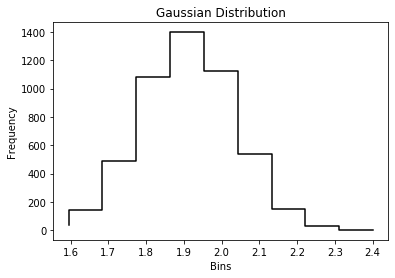

In [5]:
plt.plot(bins[:-1], counts, drawstyle='steps', color = 'black')
plt.title("Gaussian Distribution")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

*Figure 1: A histogram of the 5000 random datapoints using Gaussian Distribution, with $\mu = 2$ and $\sigma = 0.125$.*

**Answer:** The histrogram for the Gaussian distribution figure illustrates that the Gaussian distribution is made with a mean equal to 2 and a standard deviation equal 0.125, and 10 bins. 

## Binning Integers

#### 1.4) Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

**Answer:** Generating the integers, finding min and max: 

In [6]:
np.random.seed(42)
lam = 10
n = 5000
rand_pois = np.random.poisson(lam, n) # Generating numbers

max_pois, min_pois = np.max(rand_pois), np.min(rand_pois)
print(f"min value: {min_pois} and max value: {max_pois}")

min value: 1 and max value: 24


#### 1.5) Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s bin parameter as bin = $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [7]:
v = np.unique(rand_pois)
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Since the np.histogram bins parameter considers the values in *v* as bin edges, the first bin will only contain 1, second will only contain 2, etc. but the last bin will contain both of the two largest values (24 and 27 in this case). Thus, we should add an extra value to make sure the largest value is a separate bin.


In [8]:
v = np.append(v, np.max(v))
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 24])

We can now create the histogram using np.histogram()

In [9]:
rand_hist2 = np.histogram(rand_pois, bins=v)
rand_hist2

(array([  1,  15,  39,  85, 179, 320, 468, 574, 619, 609, 560, 466, 399,
        238, 154, 121,  76,  41,  20,   9,   4,   1,   1,   1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 24]))

To verify the bins are correct, we can use np.bincount(), which counts the occurances of each value, and we see that the bins counts match.

In [10]:
np.bincount(rand_pois)

array([  0,   1,  15,  39,  85, 179, 320, 468, 574, 619, 609, 560, 466,
       399, 238, 154, 121,  76,  41,  20,   9,   4,   1,   1,   1])

The sum over the bins is:

In [11]:
print('Sum over bins:', rand_hist2[0].sum())

Sum over bins: 5000


As explained above, the first element of the binning vector is equal to the minimum element of poisson distribution. The last element can be handled in several ways, in this case we chose to dublicate it, but it might as well have been any larger number than the max value in order to create the last bin.

#### 1.6) Use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

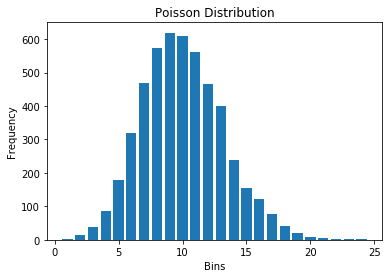

In [12]:
plt.bar(rand_hist2[1][:-1], rand_hist2[0])
plt.title("Poisson Distribution")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

*Figure 2: A bar chart illustrating n=5000 random datapoints using Poisson Distribution, with $\lambda = 10$.*

**Answer:** The above figure visualize the Poisson distribution with 5000 numbers and a 𝜆 equal to 10. 

## Binning and plotting degree distributions.

#### 1.7) Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 

**Answer**: 
First, we have to figure out what value p should take in the ER parameters (we already know that N=5000). We use equation from box 3.11 in *Network Science*[1]:
$$ <k> = p(N-1) <=> p = \frac{<k>}{N-1} = \frac{10}{4999}$$ 

which gets us a value of p at:

In [13]:
N = 5000
p = 10/(N-1)
print(f"p = {p}")

p = 0.002000400080016003


#### 1.8) Now, use networkx to create the graph and extract the degree distribution.

**Answer:** Using NetworkX we generate the ER graph with the parameters above and extract degrees from all nodes in order to get the degree distribution of the entire graph. 

In [14]:
er = nx.erdos_renyi_graph(N, p, seed=42)      # Creating graph
degrees = [er.degree(c) for c in er.nodes()]  # Degree distribution

#### 1.9) Create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

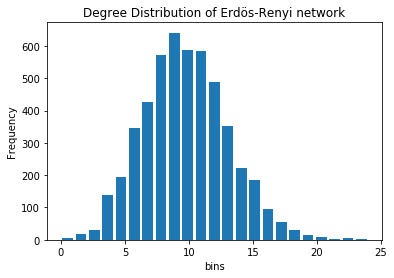

In [15]:
plt.hist(degrees, bins=23, rwidth=0.8)
plt.title("Degree Distribution of Erdös-Renyi network")
plt.xlabel("bins")
plt.ylabel("Frequency")
plt.show()

*Figure 3: A bar chart illustrating the degree distribution of an Erdös-Renyi network of 5000 nodes with $p = 0.002$.*

**Answer:** We see that the plot below is similar to the Poisson Distribution above, which is as desired. 
This is expected, as the linking probability of the Erdős-Rényi network is derived from avg. degree = 10, corresponding to a poisson distribution with $\lambda = 10$

# Part 2: Random networks and plotting in `networkx`

### Assignments 3.11 in Book
#### 2.1)(book) What is the expected number of links, 〈L〉?

**Answer:**
The average number of links can be found using the fomula from box 3.11 in *Network Science*[1]: 
$$ <L> = \frac{pN(N-1)}{2} $$. 
We calculate the expected number:

In [16]:
#Defining given network parameters
N = 3000
p = 10**(-3)

L_avg = (p*N*(N-1))/2
print('L =',L_avg)
print('Since we cant have half a link:',np.floor(L_avg))

L = 4498.5
Since we cant have half a link: 4498.0


#### 2.2)(book) In which regime is the network?

According to Albert-László, et al, chapter 3.6 [1], we have:
* Supcritical (p < 1/N) 
* Critical point (p = 1/N)
* Supercritical (p > 1/N)

In [17]:
print(f"Is p > 1/N? {p > 1/N}")

Is p > 1/N? True


**Answer:** Since p > 1/N, the network is in the **supercritical regime**, meaning it is expected to have a giant component. Most real networks are supercritical [1].

#### 2.3)(book) Calculate the probability $p_c$ so that the network is at the critical point

According to Albert-László, et al, chapter 3.6 [1], we can calculate the probability using: $p_c = \frac{1}{N}$:  

In [18]:
print('p_c must be:', 1/N)

p_c must be: 0.0003333333333333333


**Answer:** $p_c$ must be 0.000333

#### 2.4)(book) Given the linking probability $p = 10^{-3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

According to Albert-László, et al, chapter 3 [1], a connected regime is when $$k > ln(N)$$. So we wish to find an N that satisfies this. We know that k is calculated as $$ k = p \cdot (N-1)$$ So we substitute k for $p \cdot (N-1)$: $$ ln(N) = p \cdot (N-1) $$ with p inserted: $$ ln(N) = 10^{-3} \cdot (N-1) $$ which works for N =~ 9119. We double-check:

In [19]:
(np.log(9119) > 10**(-3)*(9119-1))

True

and double-check visually as well:

For the network to have only one component the number of nodes 𝑁𝑐𝑟 needs to be higher than:
N_cr = [9119.]


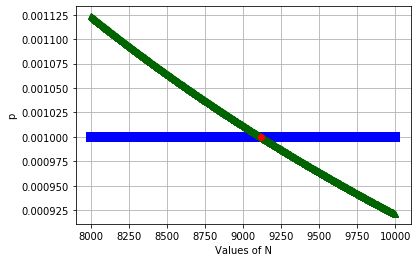

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
N_plot = np.arange(8000,10000, 2)

y1 = np.linspace(0.001,0.001, 1000)
x1 = np.linspace(8000,10000, 1000)
y2 = np.log(N_plot)/N_plot
x2 = np.linspace(8000,10000, 1000)

ax.plot(x1, y1, color='blue',linewidth=10)
ax.plot(x2, y2, color='darkgreen', marker='^')


# Plot the cross point
idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
plt.plot(x1[idx], y1[idx], 'ro')
plt.xlabel('Values of N')
plt.ylabel('p')
plt.grid()
plt.plot()

print('For the network to have only one component the number of nodes 𝑁𝑐𝑟 needs to be higher than:')
print(f"N_cr = {np.round(x1[idx])}")
plt.show()

*Figure 4: A graph used to determine the desired value of N, visually. The blue line represents $p=10^{-1}$, and the green line represents different values of N. The red dot indicates the value of N that satifies the network only having one component.*

The above plot confirms the value of N to be 9119 for which we only have one component - namely the value in the red dot.

#### 2.5)(book) For the network in (d), calculate the average degree〈kcr〉and the average distance between two randomly chosen nodes〈d〉.


**Answer:**
We use the value for $N^{cr}$ found in exercise 2.4 above and then use equations (3.14) and (3.19) in *Network Science* [1] to calculate $k_{cr}$ and $<d>$, respectively

In [21]:
N_cr = 9119 # 
k_cr = np.log(N_cr) # using equation (3.14) in the book 
print("k_cr =",np.round(k_cr,2))

d = np.log(N_cr)/ np.log(k_cr) #using equation (3.19) in the book
print("d =",np.round(d,2))

k_cr = 9.12
d = 4.13


#### 2.6)(book) Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

In order to calculate this, we use the $k_{cr}$ found in exercise 2.5 in equation (3.8) from *Network Science* [1]. 

In [22]:
p_k = np.exp(-k_cr)*((k_cr**k_cr)/gamma(k_cr + 1))    # Equation 3.8
print("p_k =", np.round(p_k,2))

p_k = 0.13


**Answer:**
The degree distribution is found to be $p_k = 0.13$

### (End of exercises from book) 

### Paths 

#### 2.7) Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

/Users/benedictehejgaard/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


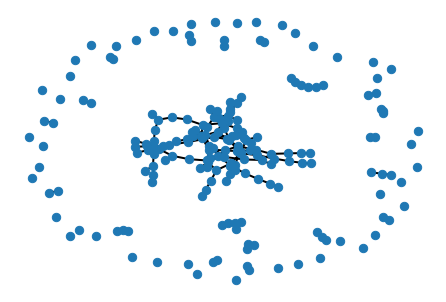

In [23]:
N = 200       # Nodes
k = 1.5       # Avg. Degree
p = k/(N-1)   # Calculating p

ER_4 = nx.erdos_renyi_graph(N,p, seed=42)
nx.draw(ER_4, pos=nx.spring_layout(ER_4), node_size=70, width =2)

*Figure 5: A random network with 200 nodes and average degree of 1.5.*

In [24]:
print(f"Is p > 1/N? {p > 1/N}")

Is p > 1/N? True


**Answer**: In the above plot we see the random network. Since $p > \frac{1}{N}$, the network is in the supercritical regime. We notice the one giant component, which is as expected, given we are in this regime. 

#### 2.8) Extract the Giant Connected Component, GCC. (Hint. You can use `nx.connected_component_subgraphs`)

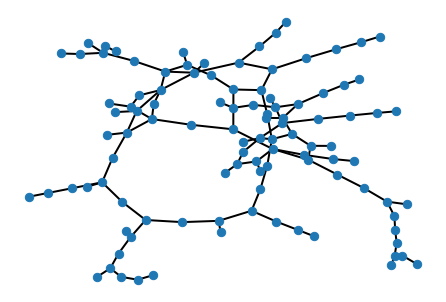

In [25]:
GCC = [ER_4.subgraph(c).copy() for c in sorted(nx.connected_components(ER_4), key=len, reverse=True)][0]
nx.draw(GCC, node_size=70, width =2)

*Figure 6: An extracted Giant Gonnected Component extracted from the random network in figure 5.*

**Answer**: Above, we see the extracted giant connected component. We see that all nodes are connected in this cluster as expected.

#### 2.9) Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [26]:
random.seed(42)
Node = random.choice(list(GCC.nodes))
print(f"Randomly chosen node: {Node}")

Randomly chosen node: 193


#### 2.10) Find all nodes that are precisely 2 steps away from that node. 
(Hint. I suggest networkx.single_source_shortest_path_length)


In [27]:
length = nx.single_source_shortest_path_length(GCC,source = Node, cutoff = 2)

length_2 = dict((k, v) for k, v in length.items() if v == 2)

print(f"Results list: {length_2}")
print(f"Nodes that are 2 steps away from found node: {length_2.keys()}")

Results list: {10: 2, 120: 2, 178: 2}
Nodes that are 2 steps away from found node: dict_keys([10, 120, 178])


**Answer**: We see that the nodes listed above are precisely 2 steps away from that node. 

#### 2.11) Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). 


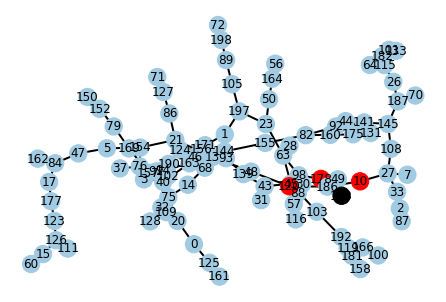

In [28]:
color_map = []
for node in list(GCC.nodes):
    if node in length_2.keys():
        color_map.append('#ff0000')
    elif node == Node:
        color_map.append('#000000')  
    else:
        color_map.append('#A0CBE2') 
nx.draw(GCC, node_color=color_map, with_labels=True,  node_size=300, width =2)

*Figure 7: The Giant Connected Component from figure 6. The starting node had been colored black, its neighboring nodes red, and the remaining nodes blue.*

**Answer**: In the above network, we hace colored the starting node black, the nodes two steps away red, and the rest blue. We see that the red nodes indeed are two steps away from the black. 

# Part 3: Watts-Strogatz Networks

#### 3.1.a) Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.

In [29]:
G_0 = nx.watts_strogatz_graph(n = 500, k = 4, p = 0, seed = 42 )
G_01 = nx.watts_strogatz_graph(n = 500, k = 4,  p = 0.1, seed = 42 )
G_1 = nx.watts_strogatz_graph(n = 500, k = 4, p = 1, seed = 42 )

#### 3.1.b) Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [30]:
G_0_d = nx.average_shortest_path_length(G_0)
G_01_d = nx.average_shortest_path_length(G_01)
G_1_d = nx.average_shortest_path_length(G_1)
print('The average shortest path length for the three graphs are:')
print(f'With probability p = 0: {np.round(G_0_d, 2)}')
print(f'With probability p = 0.1: {np.round(G_01_d, 2)}')
print(f'With probability p = 1: {np.round(G_1_d, 2)}')

The average shortest path length for the three graphs are:
With probability p = 0: 62.88
With probability p = 0.1: 8.34
With probability p = 1: 4.73


**Answer**: The average shortest path length decreases when the probability increases. Meaning that the more random the network becomes, the more connected the network becomes. At p=1, our network is fully random, meaning it will have the shortest average path lengths [1]. 

#### 3.2) Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [31]:
#A matrix of the networks is created in order to iteratively generate them and make calculations
n = 50
p_list_1 = np.array([0,0.01,0.03,0.05,0.1,0.2])
network_matrix = np.zeros([n, len(p_list_1)])

for k in range(n):
    for i in range(len(p_list_1)):
        G_3 = nx.watts_strogatz_graph(n = 500, k = 4, p=p_list_1[i])
        network_matrix[k, i] = nx.average_shortest_path_length(G_3)

In [32]:
network_std = [np.std(network_matrix[:,i]) for i in range(len(p_list_1))]
print("Network std:")
print(network_std,'\n')
network_mean = [np.mean(network_matrix[:,l]) for l in range(len(p_list_1))]
print("Network mean:")
print(network_mean)

Network std:
[7.105427357601002e-15, 5.795500713338424, 1.1930760800515252, 0.7118146698223176, 0.2767635716599262, 0.1178153981474101] 

Network mean:
[62.87575150300602, 24.32263118236473, 12.975901402805613, 10.21652488977956, 7.701977074148297, 6.101745731462927]


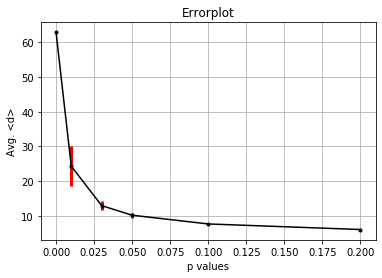

In [33]:
plt.errorbar(p_list_1,network_mean, yerr = network_std, ecolor='red', color='black', fmt='.-', elinewidth=3)
plt.xlabel('p values')
plt.ylabel('Avg. <d>')
plt.title('Errorplot')
plt.grid()
plt.show()

*Figure 8: An errorplot displaying the Average path length \<d> as a function of the p-value, with added standard deviation indication lines (red).*

**Asnwer:** We see a rapid decrease in average path length even with small rises in p-value when p=0,. After p=0.05, the change in avg. of < d > becomes severely smaller. The standard deviation also becomes smaller with higher value of p, confirming that we indeed do not see severe changes in < d > after p =~ 0.025

# Part 4: The Barabasi-Albert Model

#### 4.1) Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in `NetworkX` function, but the one you created during week 3). And plot it using `NetworkX`.


**Answer**: First, we create the graph with two nodes and add a link:

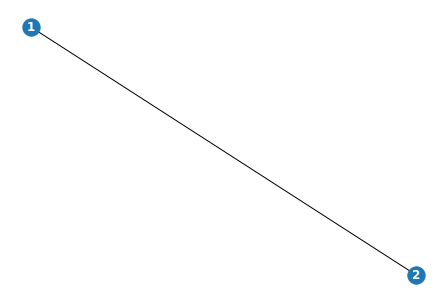

In [34]:
G_BA = nx.Graph()
G_BA.add_nodes_from([1, 2])
G_BA.add_edge(1, 2)
nx.draw(G_BA, with_labels=True, font_weight='bold',font_color='white')

*Figure 9: The Barabasi-Albert Network Model with two nodes and on edge between.*

We add a third node:

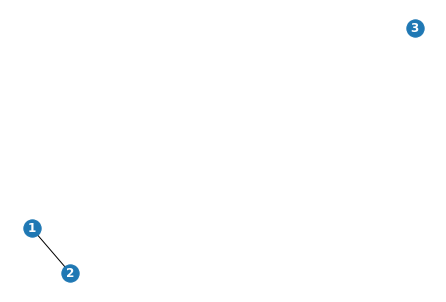

In [35]:
G_BA.add_node(3)
nx.draw(G_BA, with_labels=True, font_weight='bold',font_color='white')

*Figure 10: The Barabasi-Albert Network Model with three nodes and on edge between the two first nodes.*

In the code below, we generate a list of all the existing nodes we currently have. From that list, we pick a random node that the new node should connect to.

In [36]:
cur = functools.reduce(operator.concat, G_BA.edges)
print(f"List of current nodes: {cur}")

List of current nodes: (1, 2)


In [37]:
import random 
random.seed(42)
all_nodelinks = functools.reduce(operator.concat, G_BA.edges)      # All nodes
rand_item = all_nodelinks[random.randrange(len(all_nodelinks))]    # Choose a random one
G_BA.add_edge(3,rand_item)                                         # Connect the new edge to the random node

Repeating this procedure up to 100 nodes:

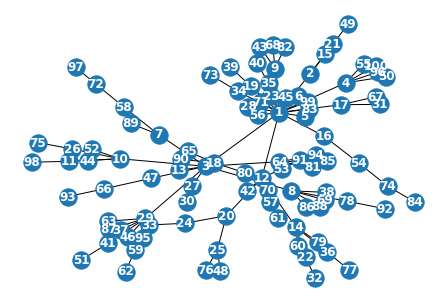

In [38]:
random.seed(42)
for i in range(4,101):
    all_nodelinks = functools.reduce(operator.concat, G_BA.edges)   # Get all the edges in a list
    rand_item = all_nodelinks[random.randrange(len(all_nodelinks))] # Choose a random node 
    G_BA.add_edge(i,rand_item)                                      # Add the new node to the randomly choosen node
    
nx.draw(G_BA, with_labels=True, font_weight='bold',font_color='white')

*Figure 11: The Barabasi-Albert Network Model with 100 connected nodes.*

**Answer:** It is evident from this procedure, that since we pick a random node from the list, the more connected a node is, the high is the probability of you selecting that node (since it will appear mode frequently in the list). 

As expected, all the nodes are connected as we build the network adding  linked node at each step.

#### 4.2) Now create a 5000 node network.

**Answer**: Adding mode nodes until we reach 5000:

In [39]:
random.seed(42)
for i in range(101,5001):
    all_nodelinks = functools.reduce(operator.concat, G_BA.edges)   # Get all the edges in a list
    rand_item = all_nodelinks[random.randrange(len(all_nodelinks))] # Choose a random node 
    G_BA.add_edge(i,rand_item)                                      # Add the new node to the randomly choosen node

#### 4.2.a) What's the maximum and minimum degree?

In [40]:
degree_sequence = sorted([d for n, d in G_BA.degree()], reverse=True)
print("min degree:",min(degree_sequence))
print("max degree:",max(degree_sequence))

min degree: 1
max degree: 152


**Answer:** The minimum and maximum degree can be seen in the output above.

#### 4.2.b) Now, bin the degree distribution, for example using `numpy.histogram`.

In [41]:
print(f'There are {len(np.unique(degree_sequence))} unique degrees,\n however from the bincount below,\n we see that they are very unevenly distributed')


There are 35 unique degrees,
 however from the bincount below,
 we see that they are very unevenly distributed


In [42]:
np.bincount(degree_sequence)

array([   0, 3319,  848,  325,  165,   96,   66,   33,   30,   18,   21,
         10,   12,    8,    9,    4,    4,    1,    4,    4,    3,    4,
          0,    2,    1,    1,    2,    1,    1,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    1,    1,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,
          0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Using `np.histogram()` with arbitrary bins may result in indistinguishable bins among the low values, thus we make custom bins as per question 1.5.

In [43]:
v_ba = np.unique(degree_sequence)
v_ba = np.append(v_ba, np.max(v_ba))
BA_hist = np.histogram(degree_sequence, bins=v_ba)
BA_hist

(array([3319,  848,  325,  165,   96,   66,   33,   30,   18,   21,   10,
          12,    8,    9,    4,    4,    1,    4,    4,    3,    4,    2,
           1,    1,    2,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,
         28,  32,  40,  41,  45,  63,  65,  72, 152, 152]))

Now the bins are created in a sensible way, and we are able to plot the degree distribution.

#### 4.2.c) Plot the distribution. Plot it with both linear and log-log axes.

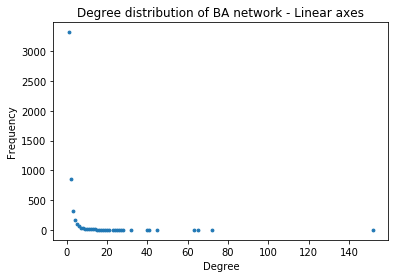

In [44]:
plt.scatter(BA_hist[1][:-1], BA_hist[0], s=8)
plt.title("Degree distribution of BA network - Linear axes")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

*Figure 12: The degree distribution (frequency) of the Barabasi-Albert Network Model with 5000 nodes.*

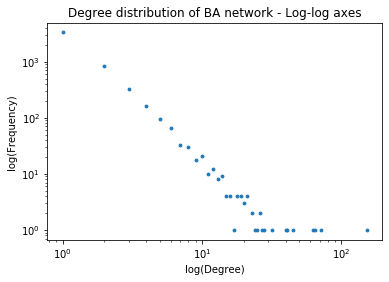

In [45]:
fig, ax = plt.subplots()
ax.scatter(BA_hist[1][:-1],BA_hist[0], s=8)
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel("log(Degree)")
plt.ylabel("log(Frequency)")
plt.title("Degree distribution of BA network - Log-log axes")
plt.show()

*Figure 13: The degree distribution (frequency) of the Barabasi-Albert Network Model with 5000 nodes on log-log axis.*

**Commentary for figure 13+14**: In figure 12, we notice a large frequency of nodes with a low degree, a frequency that drops to nearly zero when the degree count starts to rise even slighly. To examine this drop further, we displayed the graph with log-log axis in figure 13. Here, we see that the "drop" in frequency we saw in figure 12 corresponds to a power-function (since its a relatively straight line in figure 13). Furthermore, we see that the frequency of nodes with degrees higher than ~1.2 ($log(10^{1.2})$) is almost 0 (log(1)). 

This is as expected, since we in *Network Science* chapther 5 learn that the growth property of the Barabasi-Albert Network grows with the *Power law* [2].  

# Part 5: Power-laws and the friendship paradox

#### 5.1) Pick a node *i* at random (e.g.) use random.choice). Find its degree

In [46]:
random.seed(42)
rand_node = random.choice(range(5000))
print("Random node: ", rand_node)

Random node:  912


In [47]:
print(f'The degree of node {rand_node} is {G_BA.degree(rand_node)}')

The degree of node 912 is 1


#### 5.2) Find *i*'s neighbors. And calculate their average degree

In [48]:
node_neighbors = [n for n in G_BA.neighbors(rand_node)]                       # Nodes of all neighbors
neighbors_avg_degree = np.mean([d for n, d in G_BA.degree(node_neighbors)])   # Avg. degree of neighboring nodes
print('The average degree over i\'s neighbors is:', neighbors_avg_degree)

The average degree over i's neighbors is: 15.0


#### 5.3) Compare the two numbers to check if it's true that *i*'s friends (on average) have more friends than *i*.

In [49]:
i_avg_degree = G_BA.degree(rand_node) # Avg degree for node i
neighbors_avg_degree > i_avg_degree   # Does neighbors have more neighbors than node i?

True

Node *i* has a degree of 1, whereas *i*'s neighbors (in this case only 1 neighbor) has an average degree of 15. Thus, the friendship paradox, that "*On average my friends are more popular than I am*"  is for the random node 912 true. 

#### 5.4) Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [50]:
random.seed(42)
count_true = 0
count_false = 0

for i in range(1000):
    node = random.choice(range(5000))
    node_neighbor = [n for n in G_BA.neighbors(node)]
    mn = np.mean([d for n, d in G_BA.degree(node_neighbor)]) 
    if mn > G_BA.degree(node):
        count_true = count_true + 1
    else:
        count_false = count_false + 1

print(f'The paradox is true in {count_true} cases')
print(f'The paradox is false in the remaining {count_false} cases')


The paradox is true in 852 cases
The paradox is false in the remaining 148 cases


**Answer:** We see that the Friendship Paradox is true in most cases (~85%). 

#### 5.5) Compare to the ER network of same size and same *P*. What are the differences? Explain in your own words. Hints: To get started, take a look at the degree distribution, and study the number of connected components.

We create the ER network to be used in the comparison


In [51]:
#Find p using p = k/(N-1)
k = np.mean(degree_sequence) #Average degree of BA network
N = 5000

p = k/(N-1)
print(f'Probability of link:', p)

Probability of link: 0.0004


In [52]:
G_ER = nx.erdos_renyi_graph(N, p, seed=42)

First we find the min og max degree for the random ER Network and comapre the result to the BA results.

In [53]:
degree_sequence_er = sorted([d for n, d in G_ER.degree()], reverse=True)
degree_sequence_er_min = min(degree_sequence_er)
degree_sequence_er_max = max(degree_sequence_er)

degree_sequence_ba_min = min(degree_sequence)
degree_sequence_ba_max = max(degree_sequence)

The min and max degree for the ER and BA Network is displayed in the table below

Network  | min | max
--- | --- | ---
ER | 0   | 8
BA | 1   | 152

The table shows that the BA Network have a minimum degree of 1 since when new nodes are added, an edges is immediately constructed between the new node and an exsisting. Additionally, the BA Network have a much higher max degree, which is because the ER network randomly choose edges. While ER network randomly choose an edge, the BA model use a procedure where a new node tends to link to a node which have a higher degree.[2]

Now we look at the degree distribution of the ER network using the same approach as before.

In [54]:
v_er = np.unique(degree_sequence_er)
v_er = np.append(v_er, np.max(v_er))
ER_hist = np.histogram(degree_sequence_er, bins=v_er)
ER_hist

(array([ 722, 1410, 1316,  901,  421,  162,   50,   15,    3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8]))

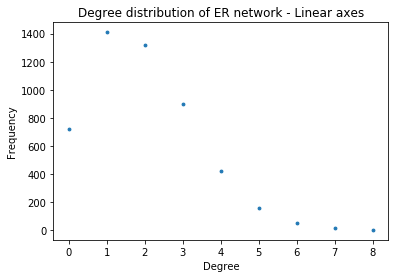

In [55]:
plt.scatter(ER_hist[1][:-1], ER_hist[0], s=8)
plt.title("Degree distribution of ER network - Linear axes")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

*Figure 14: The degree distribution (frequency) of the Erdős-Rényi Network Model with 5000 nodes.*

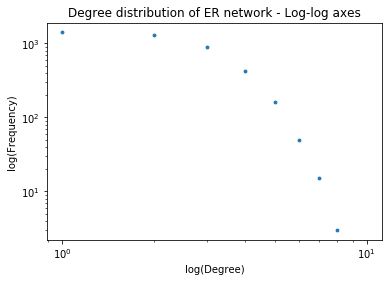

In [56]:
fig, ax = plt.subplots()
ax.scatter(ER_hist[1][:-1],ER_hist[0], s=8)
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel("log(Degree)")
plt.ylabel("log(Frequency)")
plt.title("Degree distribution of ER network - Log-log axes")
plt.show()

*Figure 15: The degree distribution (frequency) of the Erdős-Rényi Network Model with 5000 nodes on log-log axes.*

**Commentary for figure 14+15**: We see that the ER network, compared to the BA network above, does not follow the power-law that we saw in the BA model. In the ER model, the frequency of nodes with lower degrees stay high for much longer than the BA network in figures 12 and 13. 

Next, we look at the number of connected components for the BA and ER Network

In [57]:
nx.number_connected_components(G_BA) # Barabási-Albert Network

1

In [58]:
nx.number_connected_components(G_ER) # Erdős-Rényi Network

869

**Explanation**: The BA Network is constructed using the Barabási-Albert Model, which uses the growth and preferential attachment mechanisms. This means that a new node is added at each timestep and the node has a higher probability of linking to the more connected nodes.[2] This results in a BA Network which only contains one connected component (as seen in cell [57] above). The Random Erdős-Rényi Network, on the other hand, assumes that the number of nodes is fixed and the edges are constructed randomly, resulting in the larger number of connected components in cell [58] above. [2]

# References

[1] Barabási, A. L. (2016). Network science. Cambridge university press, Chapter 3.

[2] Barabási, A. L. (2016). Network science. Cambridge university press, Chapter 5.